# Naive Bayes Spam Classifier


In [43]:
# getting all the pre-requisite dependencies
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB                           # The model used for classifiaction is Multinomial Naive Bayes
from sklearn.model_selection import train_test_split, StratifiedKFold   # StratifiedFold is preferred for more uniform splitting
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Preparing the data
The downloaded Spambase dataset (http://archive.ics.uci.edu/ml/datasets/Spambase) consists of 4,601 e-mails, of which `1,813 are spam` (39.4%). The data set archive contains a processed version of the e-mails wherein `57 real-valued features` have been extracted and the spam/non-spam label has been assigned.
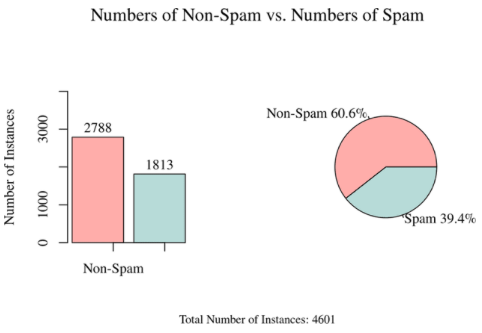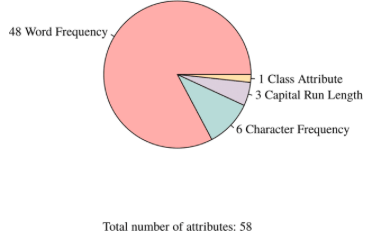

In [44]:
# fetching the data and generating the features set(x), target set(y)
data = pd.read_csv('spambase.data').values
x = data[:,:48]                            # considering only WORD_frequency attribute (can use all of 57 features too)
y = data[:,-1]                             # the last column signifies spam(1) or not spam(0)

### Parameters regarding model tuning
Given different sets of parameters pertaining to a machine learning model and/or data preprocessing algorithms, or even two or more different models, the goal of model tuning and/or model selection is to pick a set of parameters of a classifier so that the best averaged performance is achieved. With these concepts in mind, we tweak our naive Bayes classifier incorporating with cross-validation.
> We choose to explore the following values for the parameter tuning:
- __*alpha*__ : smoothing factor, the initial count for a term
- __*fit_prior*__ : whether or not to use a prior tailored to the training data


In [45]:
smoothing_factors = [0.5, 1.0, 1.5, 2.0]
fit_prior = [True, False]
df_final = None                           # initialing parameters so as to retrieve the final dataframe with minimum error
mean_final = None
err_final = 1
alpha_final = None
prior_final = None

### Building the classification model
The classification model built upon scikit-learn's `MultinomialNB` classifer. We initialize a model with smoothing factor (specified as `alpha` in scikit-learn) and prior learned from the training set (specified as `fit_prior` in scikit-learn). We simply cannot adopt the classification results from one fixed testing set, therefore, we usually apply the __*k-fold cross-validation*__ technique to assess how a model will generally perform in practice. Statistically, the averaged performance over __*k*__-fold cross-validation is an accurate estimate of how a model performs in general. Given different sets of parameters pertaining to a machine learning model and/or data preprocessing algorithms, or even two or more different models, the goal of model tuning and/or model selection is to pick a set of parameters of a classifier so that the best averaged performance is achieved.

In [46]:
# function regarding classification model, returns error & confusion matrix pertinent to a perticular fold
def model_train(model,X_train, X_test, Y_train, Y_test):
    model.fit(X_train,Y_train)                           # training the classifier
    y_pred_class = model.predict(X_test)
    cfn_mtrx = confusion_matrix(Y_test, y_pred_class)
    error = 1 - model.score(X_test,Y_test)               # getting the error after testing the classifier
    return error,cfn_mtrx

In [47]:
# performing k-fold cross validation for each set of parameters(alpha, fit_prior)
print('Alpha  Fit_prior  Avg. Error')
for i in smoothing_factors:
    for j in fit_prior:
        values = []
        model = MultinomialNB(alpha=i, fit_prior=j)
        folds = StratifiedKFold(n_splits = 10)                 # initializing a 10-fold generator
        for train_index,test_index in folds.split(x,y):
            X_train, X_test = x[train_index], x[test_index]
            Y_train, Y_test = y[train_index], y[test_index]
            error, cfn_mtrx = model_train(model,X_train, X_test, Y_train, Y_test)
            values.append([error,cfn_mtrx[0][1],cfn_mtrx[1][1]])
        df = pd.DataFrame(values, columns = ['Error','FP','FN'])
        mean = df.mean(axis = 0)
        print(' {}     {}       {:.2f}%'.format(i,j,mean[0]*100))
        if mean[0] < err_final:                                 # retrieving the set of parameters that give minimum error
            err_final = mean[0]
            df_final = df
            mean_final = mean
            alpha_final = i
            prior_final = j
print('\nRetrieved parameters for min. error of {:.2f}% ::: Alpha = {} , Fit_prior = {}'.format(err_final*100,alpha_final,prior_final))

Alpha  Fit_prior  Avg. Error
 0.5     True       14.12%
 0.5     False       14.86%
 1.0     True       14.18%
 1.0     False       14.88%
 1.5     True       14.25%
 1.5     False       14.97%
 2.0     True       14.27%
 2.0     False       15.03%

Retrieved parameters for min. error of 14.12% ::: Alpha = 0.5 , Fit_prior = True


### Evaluating the results
In the following table, one row per fold shows corresponding false positive, false negative, and overall error rates, and add one final row corresponding to the average error rates across all folds. 
> For this problem: 
- __FP__ - *false positive* is the fraction of non-spam testing examples that are misclassified as spam(1) 
- __FN__ -  *false negative* is the fraction of spam testing examples that are misclassified as non-spam(0)

In [51]:
print(df_final)                # dataframe containing 10 generated folds regarding aforementioned min. error
print('\nAvg. Error rate across all folds = {:.2f}%'.format(mean_final[0]*100))

      Error   FP   FN
0  0.093275   32  171
1  0.080260   29  174
2  0.097826   35  171
3  0.084783   37  179
4  0.154348   60  170
5  0.095652   40  177
6  0.056522   20  175
7  0.104348   35  168
8  0.359477  153  169
9  0.285403  104  154

Avg. Error rate across all folds = 14.12%


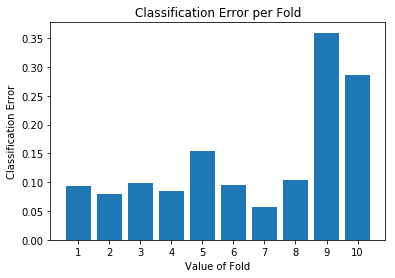

In [52]:
# plotting Classification error per fold
x_pos = list(range(1,11))
y_pos = list(df_final['Error'])
index = np.arange(len(x_pos))
plt.bar(index, y_pos)
plt.xlabel('Value of Fold')
plt.ylabel('Classification Error')
plt.xticks(index, x_pos)
plt.title('Classification Error per Fold')
plt.show()

### Conclusion
From the above, we can observe the performance of a simple Naive Bayes classification model with an __accuracy of 86%.__ Moreover, in order to increase this accuracy we can select other classification algorithms (like Random Forest, Decision Trees etc.) or deal with selection of features giving optimum results. However, considering the simplicity and in order to avoid fitting problems Naive Bayes works nicely.